# Telco Customer Dataset - Churn predcition using Decison Tree

In [1]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("rpart")
# install.packages("rattle")
# install.packages("rpart.plot")
# install.packages("RColorBrewer")
# install.packages("party")
# install.packages("partykit")
# install.packages("caret")
# install.packages("heuristica")
# install.packages("dummies")

In [2]:
library(ggplot2)
library(dplyr)
library(rpart)
library(dummies)
# library(rattle)
library(rpart.plot)
library(heuristica)
# library(RColorBrewer)
# library(party)
# library(partykit)
# library(caret)

Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘rpart’ was built under R version 3.4.3”dummies-1.5.6 provided by Decision Patterns



## Reading dataset

In [3]:
data.set = read.csv(file="Datasets/Teleco_Cust_Attr.csv",header = T)
str(data.set)
summary(data.set)
prop.table(table(data.set$Churn))

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             


       No       Yes 
0.7346301 0.2653699 

## Data preprocessing

In [4]:
data.set$customerID = NULL
sapply(data.set,function(x){sum(is.na(x))})

gender    SeniorCitizen          Partner       Dependents 
               0                0                0                0 
          tenure     PhoneService    MultipleLines  InternetService 
               0                0                0                0 
  OnlineSecurity     OnlineBackup DeviceProtection      TechSupport 
               0                0                0                0 
     StreamingTV  StreamingMovies         Contract PaperlessBilling 
               0                0                0                0 
   PaymentMethod   MonthlyCharges     TotalCharges            Churn 
               0                0               11                0

### Handling nulls

In [5]:
data.set$TotalCharges = ifelse(is.na(data.set$TotalCharges),data.set$MonthlyCharges*data.set$tenure,data.set$TotalCharges)

In [6]:
unique(data.set$SeniorCitizen)
data.set$SeniorCitizen = as.factor(data.set$SeniorCitizen)

[1] 0 1

In [7]:
str(data.set)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

## Dummies

In [8]:
data.set.1 = data.set
data.set <- dummy.data.frame(data.set, sep = ",")
head(data.set)
# data.set$Churn,No = NULL
# data.set$Churn,Yes = NULL
data.set$Churn = data.set.1$Churn 
head(data.set)
data.set$"Churn,No"=NULL
data.set$"Churn,Yes"=NULL


"gender,Female","gender,Male","SeniorCitizen,0","SeniorCitizen,1","Partner,No","Partner,Yes","Dependents,No","Dependents,Yes",tenure,"PhoneService,No",⋯,"PaperlessBilling,No","PaperlessBilling,Yes","PaymentMethod,Bank transfer (automatic)","PaymentMethod,Credit card (automatic)","PaymentMethod,Electronic check","PaymentMethod,Mailed check",MonthlyCharges,TotalCharges,"Churn,No","Churn,Yes"
1,0,1,0,0,1,1,0,1,1,⋯,0,1,0,0,1,0,29.85,29.85,1,0
0,1,1,0,1,0,1,0,34,0,⋯,1,0,0,0,0,1,56.95,1889.50,1,0
0,1,1,0,1,0,1,0,2,0,⋯,0,1,0,0,0,1,53.85,108.15,0,1
0,1,1,0,1,0,1,0,45,1,⋯,1,0,1,0,0,0,42.30,1840.75,1,0
1,0,1,0,1,0,1,0,2,0,⋯,0,1,0,0,1,0,70.70,151.65,0,1
1,0,1,0,1,0,1,0,8,0,⋯,0,1,0,0,1,0,99.65,820.50,0,1


"gender,Female","gender,Male","SeniorCitizen,0","SeniorCitizen,1","Partner,No","Partner,Yes","Dependents,No","Dependents,Yes",tenure,"PhoneService,No",⋯,"PaperlessBilling,Yes","PaymentMethod,Bank transfer (automatic)","PaymentMethod,Credit card (automatic)","PaymentMethod,Electronic check","PaymentMethod,Mailed check",MonthlyCharges,TotalCharges,"Churn,No","Churn,Yes",Churn
1,0,1,0,0,1,1,0,1,1,⋯,1,0,0,1,0,29.85,29.85,1,0,No
0,1,1,0,1,0,1,0,34,0,⋯,0,0,0,0,1,56.95,1889.50,1,0,No
0,1,1,0,1,0,1,0,2,0,⋯,1,0,0,0,1,53.85,108.15,0,1,Yes
0,1,1,0,1,0,1,0,45,1,⋯,0,1,0,0,0,42.30,1840.75,1,0,No
1,0,1,0,1,0,1,0,2,0,⋯,1,0,0,1,0,70.70,151.65,0,1,Yes
1,0,1,0,1,0,1,0,8,0,⋯,1,0,0,1,0,99.65,820.50,0,1,Yes


In [9]:
head(data.set)

"gender,Female","gender,Male","SeniorCitizen,0","SeniorCitizen,1","Partner,No","Partner,Yes","Dependents,No","Dependents,Yes",tenure,"PhoneService,No",⋯,"Contract,Two year","PaperlessBilling,No","PaperlessBilling,Yes","PaymentMethod,Bank transfer (automatic)","PaymentMethod,Credit card (automatic)","PaymentMethod,Electronic check","PaymentMethod,Mailed check",MonthlyCharges,TotalCharges,Churn
1,0,1,0,0,1,1,0,1,1,⋯,0,0,1,0,0,1,0,29.85,29.85,No
0,1,1,0,1,0,1,0,34,0,⋯,0,1,0,0,0,0,1,56.95,1889.50,No
0,1,1,0,1,0,1,0,2,0,⋯,0,0,1,0,0,0,1,53.85,108.15,Yes
0,1,1,0,1,0,1,0,45,1,⋯,0,1,0,1,0,0,0,42.30,1840.75,No
1,0,1,0,1,0,1,0,2,0,⋯,0,0,1,0,0,1,0,70.70,151.65,Yes
1,0,1,0,1,0,1,0,8,0,⋯,0,0,1,0,0,1,0,99.65,820.50,Yes


## Test Train Split

In [10]:
set.seed(987)
sample = sample(1:nrow(data.set),size=0.7*nrow(data.set))
train.data.set = data.set[sample,]
test.data.set = data.set[-sample,]
nrow(data.set)
nrow(train.data.set)
nrow(test.data.set)

[1] 7043

[1] 4930

[1] 2113

## Decision Tree

In [11]:
dec.tree.1 = rpart( Churn ~ . , data=test.data.set,  method = "class")
summary(dec.tree.1)
dec.tree.1$variable.importance

Call:
rpart(formula = Churn ~ ., data = test.data.set, method = "class")
  n= 2113 

          CP nsplit rel error    xerror       xstd
1 0.06989247      0 1.0000000 1.0000000 0.03631603
2 0.01075269      3 0.7706093 0.7885305 0.03344956
3 0.01000000      5 0.7491039 0.8136201 0.03383508

Variable importance
             Contract,Month-to-month                               tenure 
                                  19                                   15 
                        TotalCharges                    Contract,Two year 
                                  11                                   10 
                   Contract,One year                       TechSupport,No 
                                   9                                    9 
                      MonthlyCharges          InternetService,Fiber optic 
                                   7                                    6 
                 InternetService,DSL                    MultipleLines,Yes 
               

Contract,Month-to-month                               tenure 
                          145.653566                           120.336187 
                        TotalCharges                    Contract,Two year 
                           84.616731                            76.441206 
                   Contract,One year                       TechSupport,No 
                           69.212360                            67.847671 
                      MonthlyCharges          InternetService,Fiber optic 
                           54.098201                            47.619530 
                 InternetService,DSL                    MultipleLines,Yes 
                           37.649916                            22.864808 
                   OnlineSecurity,No                     MultipleLines,No 
                           21.742501                             6.478620 
                     OnlineBackup,No DeviceProtection,No internet service 
                            5.711415                             4.515414 
                  InternetService,No     OnlineBackup,No internet service 
                            4.515414                             4.515414 
  OnlineSecurity,No internet service 
                            4.515414

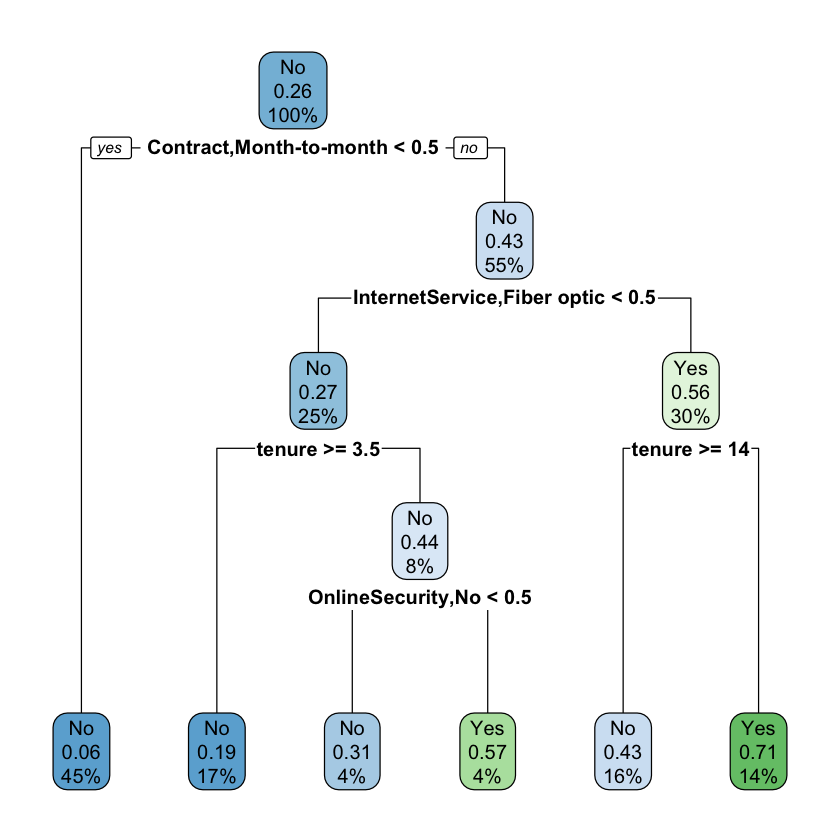

In [12]:
rpart.plot(dec.tree.1)
# ?rpart

In [13]:
## Predictions
pred.train.data.set = as.data.frame(train.data.set$Churn)
colnames(pred.train.data.set)[1] = "Churn"
pred.train.data.set$Churn.pred = predict(dec.tree.1,newdata = train.data.set,type="class")
head(pred.train.data.set)
table(pred.train.data.set$Churn)

Churn,Churn.pred
No,No
No,No
Yes,No
Yes,Yes
No,No
No,No



  No  Yes 
3619 1311 

In [19]:
table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)
nrow(pred.train.data.set)
tr.TN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[1]
tr.FP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[2]
tr.FN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[3]
tr.TP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[4]

tr.Accuray = (tr.TN+tr.TP)/(tr.TN+tr.TP+tr.FN+tr.FP)
tr.Precision = (tr.TP)/(tr.TP+tr.FP)
tr.Recall = (tr.TP)/(tr.TP+tr.FN)
tr.F1 = 2*tr.Precision*tr.Recall/(tr.Precision+tr.Recall)

tr.Accuray
tr.Precision
tr.Recall
tr.F1

     
        No  Yes
  No  3309  310
  Yes  714  597

[1] 4930

[1] 0.7922921

[1] 0.4553776

[1] 0.6582139

[1] 0.5383228

In [16]:
## Predictions
pred.test.data.set = as.data.frame(test.data.set$Churn)
colnames(pred.test.data.set)[1] = "Churn"
pred.test.data.set$Churn.pred = predict(dec.tree.1,newdata = test.data.set,type="class")
head(pred.test.data.set)
table(pred.test.data.set$Churn)

Churn,Churn.pred
Yes,No
No,No
No,No
Yes,No
No,No
No,No



  No  Yes 
1555  558 

In [18]:
table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)
tt.TN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[1]
tt.FP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[2]
tt.FN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[3]
tt.TP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[4]

tt.Precision = (tt.TP)/(tt.TP+tt.FP)
tt.Accuray = (tt.TN+tt.TP)/(tt.TN+tt.TP+tt.FN+tt.FP)
tt.Recall = (tt.TP)/(tt.TP+tt.FN)
tt.F1 = 2*tt.Precision*tt.Recall/(tt.Precision+tt.Recall)

tt.Accuray
tt.Precision
tt.Recall
tt.F1

     
        No  Yes
  No  1430  125
  Yes  293  265

[1] 0.802177

[1] 0.4749104

[1] 0.6794872

[1] 0.5590717